### 2 - Classifying two half-moons
https://www.learnpytorch.io/02_pytorch_classification/

In [27]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

Create dataset

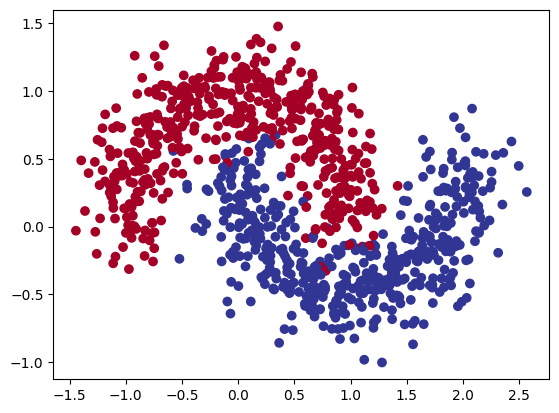

In [22]:
RANDOM_STATE=42
X, y = make_moons(n_samples=1000, shuffle=True, noise=0.2, random_state=RANDOM_STATE)

plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu)

Convert to tensors and split into test and training set

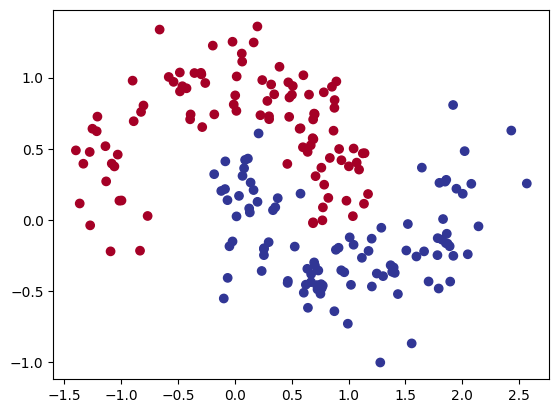

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

plt.scatter(x=X_test[:, 0], 
            y=X_test[:, 1], 
            c=y_test, 
            cmap=plt.cm.RdYlBu)

X_train = torch.from_numpy(X_train).type(torch.float).to(device)
X_test = torch.from_numpy(X_test).type(torch.float).to(device)
y_train = torch.from_numpy(y_train).type(torch.float).to(device)
y_test = torch.from_numpy(y_test).type(torch.float).to(device)

Create model

In [33]:
class BinaryClassificationModel(nn.Module):
  def __init__(self, input_features=2, output_features=1, hidden_units=10):
    super().__init__()
    self.neural_network = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(), 
            nn.Linear(in_features=hidden_units, out_features=output_features),
            nn.ReLU()
        )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.neural_network(x)

Create custom accuracy function

In [44]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100 
    return acc

Train model

In [39]:
model = BinaryClassificationModel(input_features=2, output_features=1).to(device)

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [40]:
model.state_dict()

OrderedDict([('neural_network.0.weight',
              tensor([[ 0.4979,  0.5540],
                      [-0.0258, -0.6872],
                      [ 0.1753,  0.6313],
                      [ 0.2674,  0.2844],
                      [ 0.5589, -0.6308],
                      [ 0.4690,  0.4609],
                      [-0.0215,  0.3210],
                      [-0.6836, -0.0050],
                      [-0.1061, -0.3669],
                      [ 0.2820,  0.2603]], device='cuda:0')),
             ('neural_network.0.bias',
              tensor([ 0.1966, -0.6312, -0.6572,  0.2585, -0.2919, -0.1788, -0.6460, -0.3086,
                       0.1752, -0.0703], device='cuda:0')),
             ('neural_network.2.weight',
              tensor([[-0.1672, -0.1941,  0.0061,  0.0046,  0.3043,  0.1393,  0.0549,  0.0092,
                        0.2709, -0.2149],
                      [-0.2729,  0.2175,  0.2130,  0.2198, -0.2920, -0.0531, -0.1232,  0.0790,
                        0.2322,  0.1858],
           

In [ ]:
# # Fit the model
# torch.manual_seed(42)
# epochs = 1000

# # Put all data on target device
# X_train, y_train = X_train.to(device), y_train.to(device)
# X_test, y_test = X_test.to(device), y_test.to(device)

# for epoch in range(epochs):
#     # 1. Forward pass
#     y_logits = model_3(X_train).squeeze()
#     y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    
#     # 2. Calculate loss and accuracy
#     loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits
#     acc = accuracy_fn(y_true=y_train, 
#                       y_pred=y_pred)
    
#     # 3. Optimizer zero grad
#     optimizer.zero_grad()

#     # 4. Loss backward
#     loss.backward()

#     # 5. Optimizer step
#     optimizer.step()

#     ### Testing
#     model_3.eval()
#     with torch.inference_mode():
#       # 1. Forward pass
#       test_logits = model_3(X_test).squeeze()
#       test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
#       # 2. Calculate loss and accuracy
#       test_loss = loss_fn(test_logits, y_test)
#       test_acc = accuracy_fn(y_true=y_test,
#                              y_pred=test_pred)

#     # Print out what's happening
#     if epoch % 100 == 0:
#         print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

In [ ]:
if device == "cuda":
    torch.cuda.manual_seed(RANDOM_STATE)
else:
    torch.manual_seed(RANDOM_STATE)
    
#Set number of epochs
epochs = 10000

for epoch in range(epochs):
    ### Training

    #Put model in train mode
    model.train()

    # 1. Forward pass
    y_logits = model.forward(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # 2. Calculate loss
    loss = loss_fn(y_logits, y_train) # logits -> prediction probabilities -> prediction labels
    acc = accuracy_fn(y_true=y_train, 
                        y_pred=y_pred)
    
    # 3. Zero grad of the optimizer, or else the gradients accumulate
    optimizer.zero_grad()

    # 4. Backpropagate loss
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model.eval()
    with torch.inference_mode():
        # 6. Forward pass on test set
        test_logits = model.forward(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 7. Calculate loss and accuracy on test set
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                                y_pred=test_pred)

    # Print out what's happening
    if epoch % 1000 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

ValueError: Target size (torch.Size([200])) must be the same as input size (torch.Size([200, 1]))